In [29]:
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
import warnings
from sklearn.metrics import accuracy_score,f1_score,roc_auc_score,recall_score,precision_score

warnings.filterwarnings("ignore")

root1 = 'Covid19-dataset'
root2 = ['/test','/train']
root3 = ['/Covid','/Normal','/Viral Pneumonia']

In [29]:
### Rename

'''
remove = '.DS_Store'
path = root1+root2[1]+root3[2]

for i in range(len(root2)):
    for j in range(len(root3)):
        path = root1+root2[i]+root3[j]
        photos = os.listdir(path)
        if remove in photos:
            photos.remove(remove)

        for m in range(len(photos)):
            os.rename(path+'/%s'%(photos[m]),path+'/%d.jpg'%(m+1))
        print(path)
'''



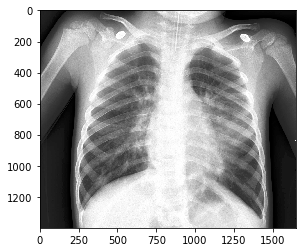

In [63]:
### Visualization
img_path = root1+root2[1]+root3[2]+'/1.jpg'

def read_img_gray(path):
    gray = cv2.imread(path,cv2.IMREAD_GRAYSCALE)
    gray_reverse = 255 - gray
    return gray_reverse

img = read_img_gray(img_path)
plt.imshow(img, cmap='Greys', interpolation='nearest')
plt.show()



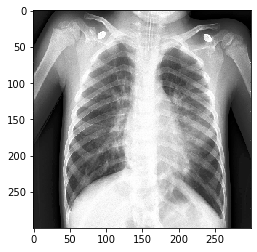

In [25]:
img_resize = cv2.resize(img,(1000,1000), interpolation=cv2.INTER_LINEAR)
plt.imshow(img_resize, cmap='Greys', interpolation='nearest')
plt.show()

In [84]:
### generate trainning & testing set:

root1 = 'Covid19-dataset'
root2 = ['/test','/train']
root3 = ['/Covid','/Normal','/Viral Pneumonia']
remove = '.DS_Store'


X_train = []
y_train = []

X_test = []
y_test = []

reshape_size = (1000,1000)

for i in range(len(root3)):
    path = root1 + root2[1] + root3[i]

    photos = os.listdir(path)
    if remove in photos:
        photos.remove(remove)

    for m in range(len(photos)):
        img_path = path + '/%d.jpg'%(m+1) 
        img = read_img_gray(img_path)
        img_resize = cv2.resize(img,(reshape_size[0],reshape_size[1]), interpolation=cv2.INTER_LINEAR)
        img_ = img_resize.reshape(1,reshape_size[0]*reshape_size[1])
        X_train.append(img_[0])
        y_train.append(i)
    
for i in range(len(root3)):
    path = root1 + root2[0] + root3[i]

    photos = os.listdir(path)
    if remove in photos:
        photos.remove(remove)

    for m in range(len(photos)):
        img_path = path + '/%d.jpg'%(m+1) 
        img = read_img_gray(img_path)
        img_resize = cv2.resize(img,(reshape_size[0],reshape_size[1]), interpolation=cv2.INTER_LINEAR)
        img_ = img_resize.reshape(1,reshape_size[0]*reshape_size[1])
        X_test.append(img_[0])
        y_test.append(i)


In [71]:
### PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=50)
X_train_PCA = pca.fit_transform(np.array(X_train))
X_test_PCA = pca.fit_transform(np.array(X_test))

In [78]:
### Random Forest:
from sklearn.ensemble import RandomForestClassifier

RF_clf = RandomForestClassifier(n_estimators=10,max_features=50, max_depth=None,min_samples_split=2, bootstrap=True)
RF_clf.fit(X_train_PCA, y_train)

y_pred = RF_clf.predict(X_train_PCA)
print(accuracy_score(y_pred, y_train))

y_pred_ = RF_clf.predict(X_test_PCA)
print(accuracy_score(y_pred_, y_test))

0.9840637450199203
0.5


In [85]:
RF_clf = RandomForestClassifier(n_estimators=10,max_features=1000, max_depth=None,min_samples_split=2, bootstrap=True)
RF_clf.fit(X_train, y_train)

y_pred = RF_clf.predict(X_train)
print(accuracy_score(y_pred, y_train))

y_pred_ = RF_clf.predict(X_test)
print(accuracy_score(y_pred_, y_test))

1.0
0.803030303030303


In [79]:
### SVM Classifier
from sklearn.svm import SVC
SVM_clf = SVC(kernel = 'poly')
SVM_clf.fit(X_train_PCA, y_train)
y_pred = SVM_clf.predict(X_train_PCA)
print(accuracy_score(y_pred, y_train))

y_pred_ = SVM_clf.predict(X_test_PCA)
print(accuracy_score(y_pred_, y_test))

0.9880478087649402
0.42424242424242425


In [86]:
SVM_clf = SVC(kernel = 'poly')
SVM_clf.fit(X_train, y_train)
y_pred = SVM_clf.predict(X_train)
print(accuracy_score(y_pred, y_train))

y_pred_ = SVM_clf.predict(X_test)
print(accuracy_score(y_pred_, y_test))

1.0
0.8787878787878788


In [80]:
### Logistic Regression
from sklearn.linear_model import LogisticRegression
LR_clf = LogisticRegression(
    penalty="l2", C=1.0, random_state=None, solver="lbfgs", max_iter=3000,
    multi_class='ovr', verbose=0,
)

LR_clf.fit(X_train_PCA, y_train)
y_pred = LR_clf.predict(X_train_PCA)
print(accuracy_score(y_pred, y_train))

y_pred_ = LR_clf.predict(X_test_PCA)
print(accuracy_score(y_pred_, y_test))

1.0
0.48484848484848486


In [87]:
LR_clf = LogisticRegression(
    penalty="l2", C=1.0, random_state=None, solver="lbfgs", max_iter=3000,
    multi_class='ovr', verbose=0,
)

LR_clf.fit(X_train, y_train)
y_pred = LR_clf.predict(X_train)
print(accuracy_score(y_pred, y_train))

y_pred_ = LR_clf.predict(X_test)
print(accuracy_score(y_pred_, y_test))

1.0
0.8636363636363636


In [88]:
X_train[0].shape

(1000000,)

In [ ]:
### Data Argument

def flip(img):
    pass 


def crop(img):
    pass


### Data Normalization:

def normal(img):
    pass